In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.random import normal


import os

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import time


In [15]:
##LOAD IN DATA

(train_images, train_labels), (_, _) = mnist.load_data()

In [16]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [17]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [19]:
# Batch and shuffle the data
train_dataset = tensorflow.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

NameError: name 'tensorflow' is not defined

In [36]:
def make_generator_model():
    
    #Establish the sequential model
    model = models.Sequential()
    
    #Start from latent space (REMEMBER - GENERATOR ARCHITECTURE MUST MIRROR DISCRIMINITOR ARCHITECTURE)
    #Noise comes in as (100,0) vector
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    
    #Transformer - Transforms output so that mean output -> 0 and SD output -> 1
    model.add(layers.BatchNormalization())
    
    #Activator - weights for generating an image
    model.add(layers.LeakyReLU())

    #Reshape - first step towards final image size (separate out neurons)
    model.add(layers.Reshape((7, 7, 256)))
    
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    #Deconvolute from 7x7x256 to 7x7x128
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    
    assert model.output_shape == (None, 7, 7, 128)
    
    #Transformer - Transforms output so that mean output -> 0 and SD output -> 1
    model.add(layers.BatchNormalization())
    
    #Activator - weights for generating an image
    model.add(layers.LeakyReLU())

    #Deconvolute from 7x7x128 to 14x14x64
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    
    assert model.output_shape == (None, 14, 14, 64)
    
    #Transformer - Transforms output so that mean output -> 0 and SD output -> 1
    model.add(layers.BatchNormalization())
    
    #Activator - weights for generating an image
    model.add(layers.LeakyReLU())

    #Deconvolute from 14x14x64 to 28x28x64
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    
    model.add(layers.BatchNormalization())
    
    model.add(layers.LeakyReLU())

    #Deconvolute from 28x28x64 to 56x56x3
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    assert model.output_shape == (None, 56, 56, 3)

    return model

In [37]:
generator_model = make_generator_model()

In [38]:
generator_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_14 (Bat  (None, 12544)            50176     
 chNormalization)                                                
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_14 (Conv2D  (None, 7, 7, 128)        819200    
 Transpose)                                                      
                                                                 
 batch_normalization_15 (Bat  (None, 7, 7, 128)       

In [112]:
noise = normal([1,100])
generated_image = generator_model(noise, training=False)

In [105]:
generated_image.shape

TensorShape([1, 56, 56, 3])

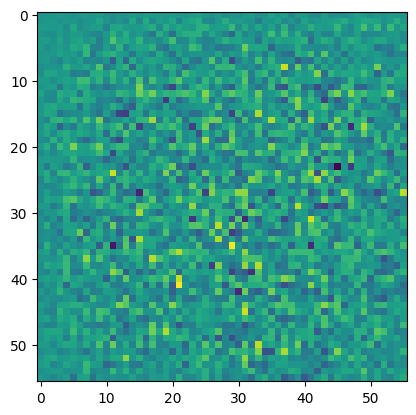

In [107]:
plt.imshow(generated_image[0, :, :, 0])

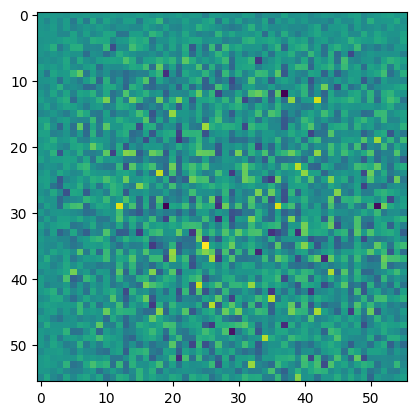

In [90]:
plt.imshow(generated_image[0, :, :, 1])

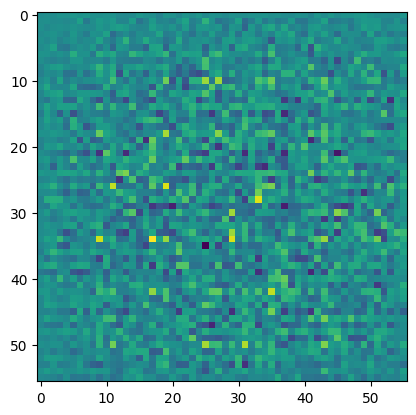

In [91]:
plt.imshow(generated_image[0, :, :, 2])

TypeError: Invalid shape (1, 56, 56, 3) for image data

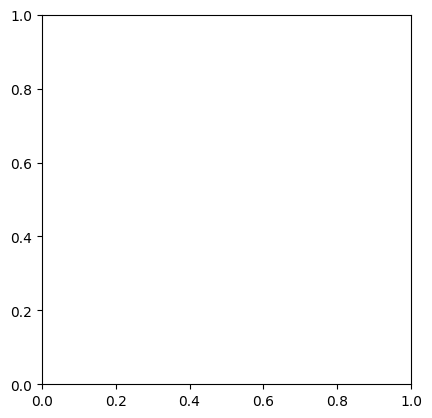

In [74]:
plt.imshow(generated_image)

In [114]:
def make_discriminator_model():
    model = Sequential([
        layers.Conv2D(64, (5,5), strides=(2, 2), padding='same', input_shape=[56, 56 , 3]),
        layers.MaxPool2D(pool_size = (2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.4),
        
        
        layers.Conv2D(128, (3,3), strides = (2,2), padding = 'same'),
        layers.LeakyReLU(),
        layers.Dropout(0.4),
        
        layers.Flatten(),
        layers.Dense(1, activation = 'sigmoid')])

    return model

In [115]:
discriminator_model = make_discriminator_model()

In [116]:
decision = discriminator_model(generated_image)
print(decision)

tf.Tensor([[0.4999164]], shape=(1, 1), dtype=float32)
